# Lab 1
# Author: Marjan Sadeghi, Ruiqi Hu

# Business Understanding
We chose the Breast Cancer dataset from Kaggle [link: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer]. The dataset includes more than four thousand patient records. Each record contains demographic information such as age, race, and marital status. It also includes clinical details like tumor size, tumor stage, grade, and hormone receptor status. Finally, the dataset records survival outcomes, including survival months and whether the patient was alive or dead at follow-up.
The dataset was collected through hospital records and clinical observations. Researchers compiled it into a structured table to allow analysis and modeling. The main goal of the dataset is to understand how different factors influence breast cancer outcomes.
The prediction task is to classify patient survival status (Alive vs. Dead) based on demographic and clinical features. This task is important for many reasons. Doctors could use predictions to identify high-risk patients early. Researchers could use predictions to study patterns in cancer outcomes. Insurance companies and policymakers might also be interested, since accurate models can guide treatment decisions and healthcare planning.
The usefulness of a prediction model depends on its performance. A model that only guesses randomly would not help. A useful model must perform significantly better than chance. In this case, accuracy above 80% would make the model credible. However, recall for high-risk patients is especially critical. Missing patients at risk of death could lead to serious consequences. Therefore, the best models would be those that balance accuracy, precision, and recall while prioritizing detection of high-risk patients.

In [1]:
!pip install missingno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
!pip install umap-learn
import umap
from sklearn.preprocessing import StandardScaler, LabelEncoder

DEPRECATION: Loading egg at /Users/ruiqihu/.local/lib/python3.11/site-packages/mylinear_cpp_handwritten-0.0.0-py3.11-macosx-11.1-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/ruiqihu/.local/lib/python3.11/site-packages/mylinear_cpp_builtin-0.0.0-py3.11-macosx-11.1-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/ruiqihu/.local/lib/python3.11/site-packages/mylinear_cpp_handwritten-0.0.0-py3.11-macosx-11.1-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION

In [2]:
# Load the dataset
file_path = '/Users/ruiqihu/Desktop/CS 7324/Lab1/Breast_Cancer.csv'
df = pd.read_csv(file_path)

# Data Understanding

In [3]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [4]:
# Check for missing data
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

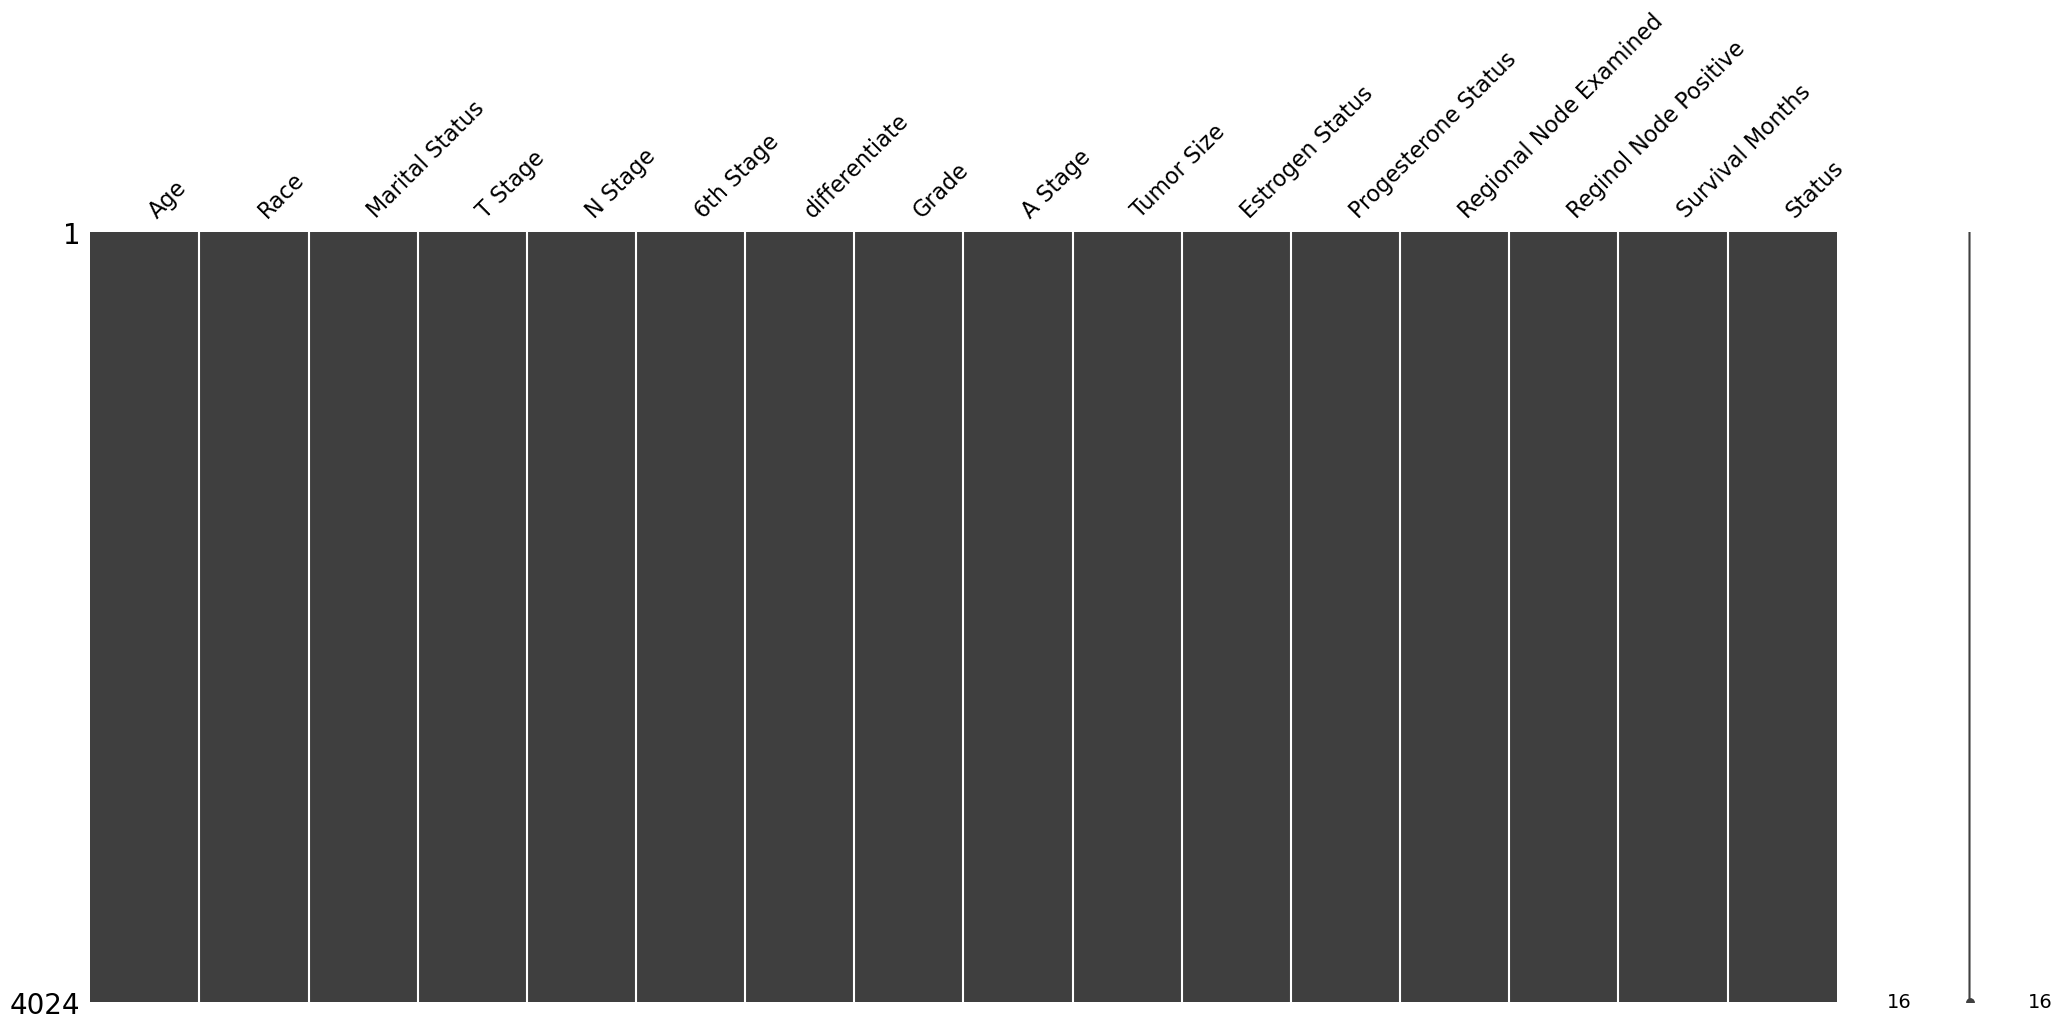

In [5]:
# Visualize missingness
msno.matrix(df)
plt.show()

In [6]:
# Check duplicates
duplicates = df[df.duplicated(keep=False)]
print("Duplicated rows are found:")
display(duplicates)

Duplicated rows are found:


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
213,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


In [7]:
# Remove duplicate rows
df = df.drop_duplicates()

print("Number of duplicates after:", df.duplicated().sum())
print("New shape of dataset:", df.shape)

Number of duplicates after: 0
New shape of dataset: (4023, 16)


## Analysis:

We began by loading the dataset using `pd.read_csv(...)` and inspecting its structure with `df.info()`. The dataset contains 4,024 rows and 16 attributes, with each row representing one breast cancer patient. 

The attributes cover both numerical and categorical information. The numeric variables include Age, Tumor Size, Regional Node Examined, Reginol Node Positive, and Survival Months. These should remain as integers because they measure counts or continuous values. 
* **Age**: patient age at diagnosis (years).
* **Tumor Size**: size of the tumor (millimeters).
* **Regional Node Examined**: number of lymph nodes examined.
* **Reginol Node Positive**: number of positive lymph nodes.
* **Survival Months**: number of months the patient survived after diagnosis.
  
The categorical variables include Race, Marital Status, T Stage, N Stage, 6th Stage, differentiate, Grade, A Stage, Estrogen Status, Progesterone Status, and Status. 
* **Race**: patient’s self-reported race (e.g., White, Black, Asian, Other).
* **Marital Status**: marital status (Married, Single, Divorced, Widowed).
* **T Stage**: tumor stage, based on tumor size and extent (T1–T4).
* **N Stage**: lymph node stage, based on cancer spread to lymph nodes (N0–N3).
* **6th Stage**: overall cancer stage from AJCC 6th edition.
* **differentiate**: tumor differentiation (Well, Moderately, Poorly differentiated).
* **Grade**: tumor grade (1 = low grade, 3 = high grade).
* **A Stage**: summary stage (Localized, Regional, Distant).
* **Estrogen Status**: Estrogen receptor (ER) test result (Positive or Negative).
* **Progesterone Status**: Progesterone receptor (PR) test result (Positive or Negative).
* **Status**: patient’s outcome (Alive or Dead).

To verify data quality, we first checked for missing values with `df.isnull().sum()`. This test returned zero missing values across all columns. To confirm this result visually, we created a matrix plot by using the `missingno` library. The matrix plot showed there is no gap in the dataset. Although it is unusual for a medical dataset to have no missing values, these 2 methods together confirmed that the data had been pre-cleaned before release.

Next we checked for duplicates using `df.duplicated().sum()`. This revealed one duplicate record. We identified it with `df[df.duplicated(keep=False)]` and confirmed that two rows, at indices 213 and 436, were identical across all 16 attributes. Because the dataset does not include a unique patient ID, we cannot definitively distinguish whether these were truly different patients with identical conditions or the same patient recorded twice. However, the probability of two independent patients matching across every attribute is extremely low. If we kept both rows, we would effectively double count the same clinical case, which could bias frequency counts, feature distributions, and later model training. For this reason we dropped the duplicate row with `df.drop_duplicates()`, reducing the dataset from 4,024 to 4,023 unique records.

# Data Visualization

In this part we use some visualization to understand oure data better.

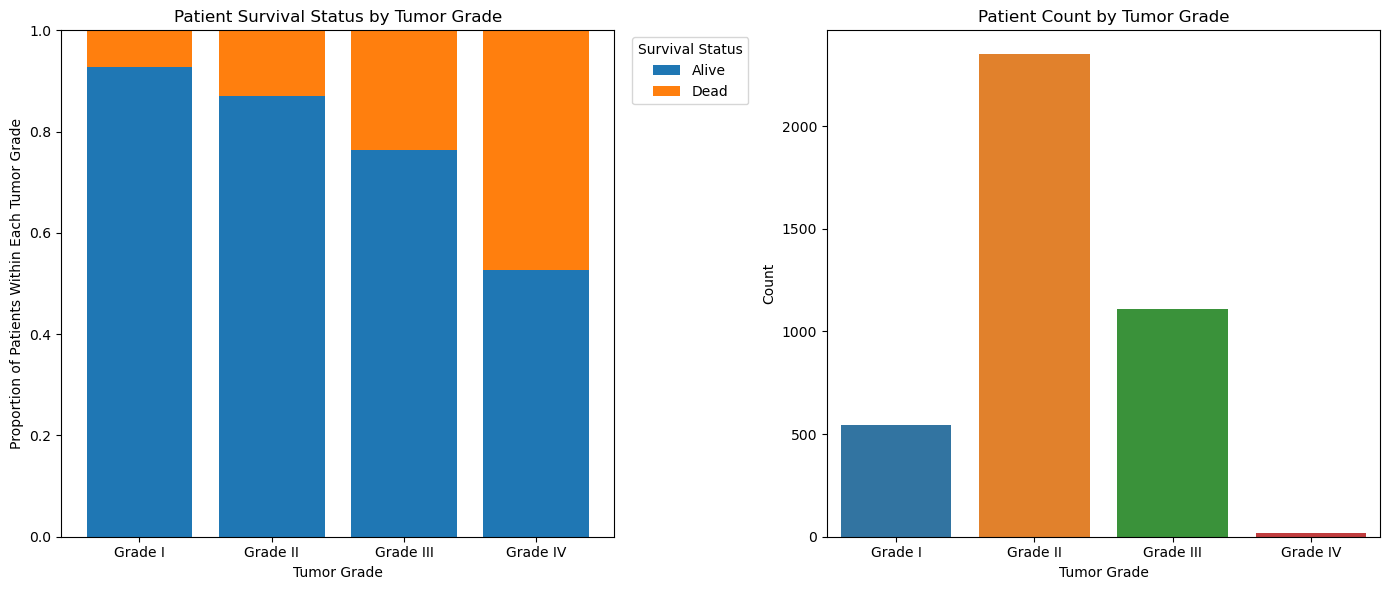

In [8]:
# 1) Inspect raw unique values
#print("Raw Grade values:")
#print(sorted(set(repr(x) for x in df["Grade"].astype(str).unique())))

# 2) Create a cleaned Grade column with consistent labels
def normalize_grade(x: str) -> str:
    s = str(x).strip().lower()
    # remove prefixes like "anaplastic:", "grade:", extra spaces
    s = re.sub(r'^\s*anaplastic\s*:\s*', '', s)
    s = re.sub(r'^\s*grade\s*', '', s)   # remove leading "grade"
    s = s.replace('–', '-').replace('—', '-')  # normalize dashes

    # map digits or roman numerals to I/II/III/IV
    # digits
    if re.fullmatch(r'4|iv|grade iv', s): return "Grade IV"
    if re.fullmatch(r'3|iii|grade iii', s): return "Grade III"
    if re.fullmatch(r'2|ii|grade ii', s): return "Grade II"
    if re.fullmatch(r'1|i|grade i', s): return "Grade I"

    # catch phrases like "grade iv (anaplastic)" etc.
    if "iv" in s:  return "Grade IV"
    if "iii" in s: return "Grade III"
    if "ii" in s:  return "Grade II"
    if "i" in s:   return "Grade I"

    # fallback: title case original
    return "Grade " + s.upper()

df["Grade"] = df["Grade"].apply(normalize_grade)

#print("\nCleaned Grade values (after normalize):")
#print(df["Grade_clean"].value_counts(dropna=False).sort_index())

# 3) Build ordered categories
grade_order = ["Grade I", "Grade II", "Grade III", "Grade IV"]
# keep only those present, in order
grade_labels = [g for g in grade_order if g in set(df["Grade"])]

# 4) Crosstab with cleaned grade (rebuild from scratch)
col_grade = "Grade"
col_status = "Status"

ct = pd.crosstab(df[col_grade], df[col_status].astype(str), normalize="index")
ct = ct.reindex(index=grade_labels)  # enforce grade order
status_levels = list(ct.columns)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Left: Survival Status by Tumor Grade (your stacked bar) ---
xg = np.arange(len(ct.index))
bottom = np.zeros(len(ct.index))
for s in status_levels:
    vals = ct[s].values
    axes[0].bar(xg, vals, bottom=bottom, label=s)
    bottom += vals

axes[0].set_xticks(xg)
axes[0].set_xticklabels(ct.index, rotation=0)
axes[0].set_xlabel("Tumor Grade")
axes[0].set_ylabel("Proportion of Patients Within Each Tumor Grade")
axes[0].set_title("Patient Survival Status by Tumor Grade")
axes[0].legend(title="Survival Status", bbox_to_anchor=(1.02, 1), loc="upper left")
axes[0].set_ylim(0, 1)

# --- Right: Countplot for Grade (your second plot) ---
sns.countplot(data=df, x="Grade", order=sorted(df["Grade"].unique()), ax=axes[1])
axes[1].set_title("Patient Count by Tumor Grade")
axes[1].set_xlabel("Tumor Grade")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


## Analysis:
We generated the left figure to examine the relationship between tumor grade and patient survival status since grade is a strong clinical predictor, it is important to visualize how survival outcomes vary across this feature.

The figure shows that survival decreases as tumor grade increases. This agrees to what we expected before the examination. Patients with Grade I tumors have the highest proportion of survival, with very few deaths. But from the right figure, we see that most of the patients have Grade 2 cancer while the number of patients with Grade 4 cancer is very limitted. Therefore, we can not rely on the results we get from the left plot.


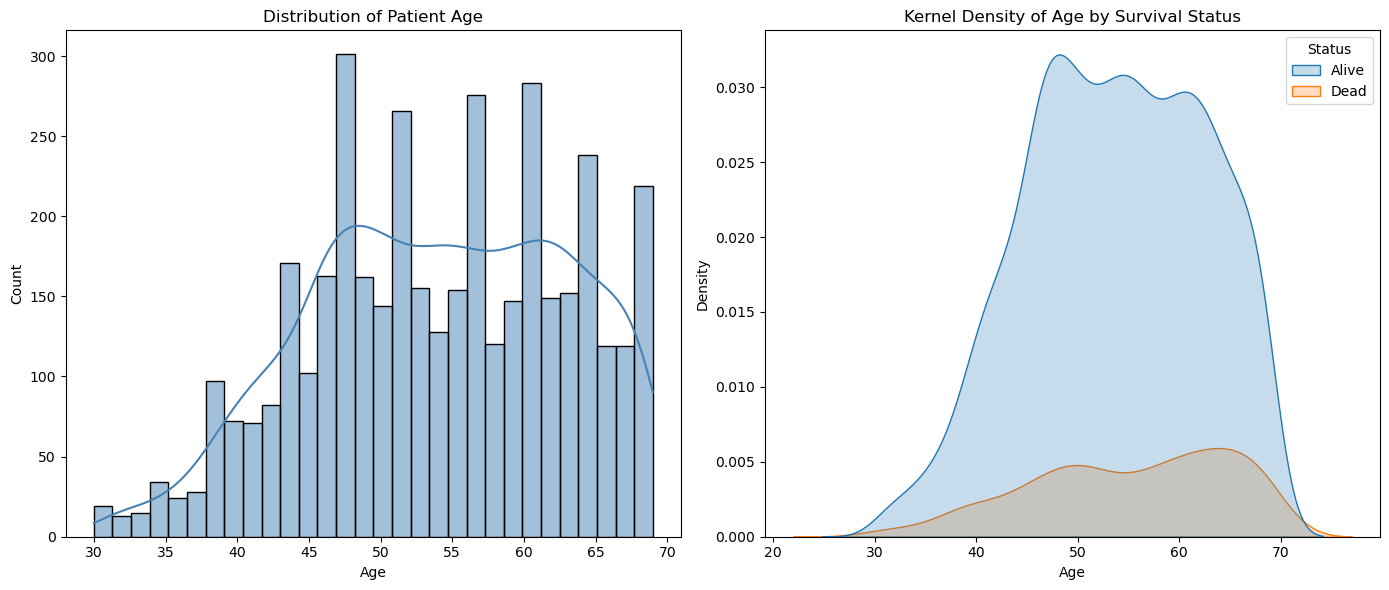

In [9]:
# Histogram of Age and Kernel Density of Age by Survival Status
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Left: Histogram of Age ---
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0], color="steelblue")
axes[0].set_title("Distribution of Patient Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# --- Right: KDE of Age by Survival Status ---
sns.kdeplot(data=df, x="Age", hue="Status", fill=True, ax=axes[1])
axes[1].set_title("Kernel Density of Age by Survival Status")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

## Analysis:
We created a histogram of patient age to understand the overall age distribution. This is important because age is a known risk factor in breast cancer. The plot shows that most patients were diagnosed between 40 and 70 years old, with a clear peak in the 50s. This pattern is consistent with medical evidence that breast cancer incidence increases in middle age.

 We also plotted a kernel density of age by survival status to see if age distributions differ between alive and dead patients. The purpose was to check whether older patients face worse outcomes. The KDE shows that patients who died tend to be slightly older compared to survivors. This supports the clinical expectation that older age increases mortality risk. The result validates the importance of age as a covariate in modeling.

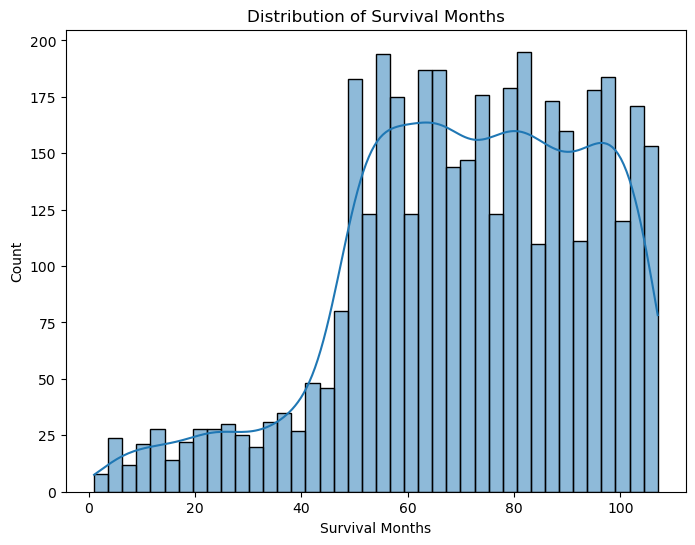

In [10]:
# Histogram of Survival Months
plt.figure(figsize=(8,6))
sns.histplot(df['Survival Months'], bins=40, kde=True)
plt.title("Distribution of Survival Months")
plt.xlabel("Survival Months")
plt.ylabel("Count")
plt.show()

## Analysis:
We plotted survival months to see how long patients lived after diagnosis. This is meaningful because survival is the key outcome of interest. The histogram shows that most patients survived between 20 and 100 months, but some lived beyond 200 months. The long tail suggests that some patients achieve much longer survival than the average. This variation highlights the importance of exploring what factors explain these differences. We need to check all the features affecting the survival months so that we can have a better understanding of our data set.

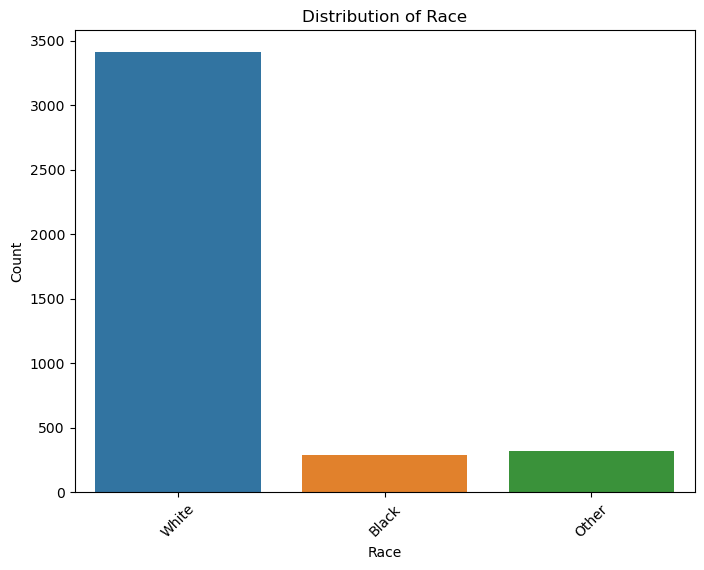

In [11]:
# Bar plot of Race
plt.figure(figsize=(8,6))
sns.countplot(x='Race', data=df)
plt.title("Distribution of Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Analysis:
We made a bar plot of race to check the demographic distribution of patients. This is important because race can influence cancer outcomes and may affect generalizability of results. The plot shows that White patients dominate the dataset, while other races are underrepresented. This imbalance means our results may not apply equally well to all groups; The treatments, predictions, or insights derived from the data may be less accurate or applicable for underrepresented groups.The finding emphasizes that race must be treated carefully in both analysis and interpretation. For these reasons we decided to drop Race feature as it might be a baised interpretations of our data.

In [12]:
# Dropping the Race
df.drop(columns=["Race"], inplace=True)

# Q1: How much the features are correlated and how it affects our prediction?

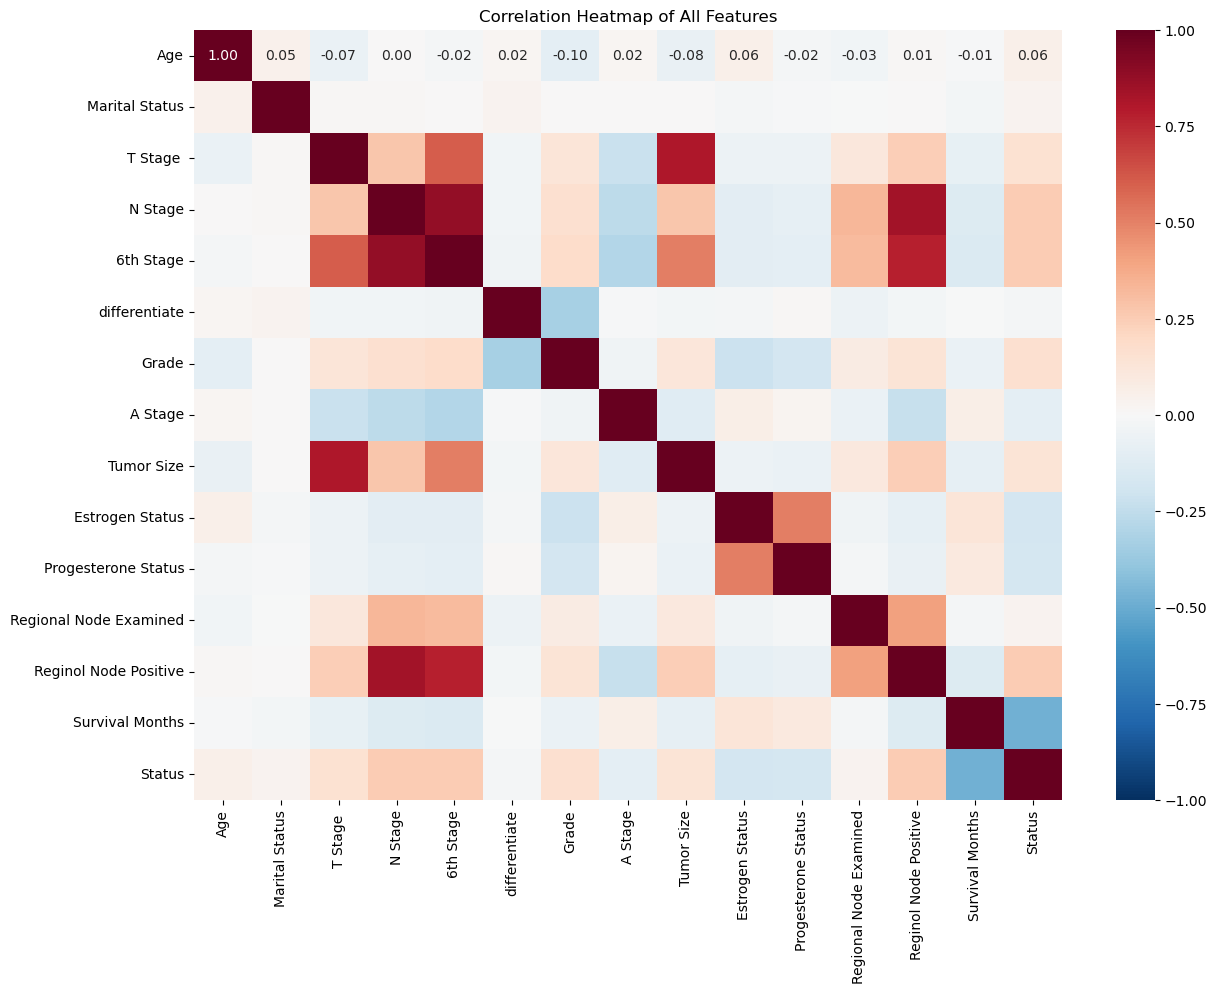

In [13]:
# Convert categorical features into numeric codes
for col in df.select_dtypes(include=["category", "object"]).columns:
    df[col] = df[col].astype("category").cat.codes

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap for all features with correlation numbers
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0, vmin=-1, vmax=1)
plt.title("Correlation Heatmap of All Features")
plt.show()

## Analysis:
The correlation heatmap was created after encoding categorical variables into numeric codes. This helps us to understand which fearures is correlated to the status which is our target. Also we can tell which features are highly correlated and can be eliminated.

In general, the Heatmap does not show any strong correlation between all the other features and Survival Status whcih is our target. There are some correlation (0.26) between the Regional Node Positive, N Stage and 6th Stage and Survival Status which implies these features affect the Survival Status, if the Stage is higher patient is more likely to does not survive. Also these features are highly correlated to each other but they provides different information so we decide to keep them.

The figure suggests us that Tumor Size and T stage are highly correlated and from the defintion, we know that they are actually representing the same information. Therefore, we decided to drop one of them which we think it is better to drop T Stage. This is true about Estrogen Status and Progesterone Status. They are highly correlated and provides overlapping information so we can eliminate one of them. That could be Progesterone Status. Moreover, the differentiate and Grade features are negatively correlated and again they implies almost the same meaning. So we can remove differentiate feature as well.


The survival variables also show clear patterns. Status (alive vs dead) is strongly and negatively correlated with survival months. This is expected, since patients coded as dead necessarily had shorter survival times. Survival months shows weaker negative correlations with tumor size, lymph node positivity, and stage. These are not strong pairwise correlations, but they align with the clinical reality that greater disease burden predicts shorter survival.

Taken together, the heatmap provides two important insights. First, staging variables and receptor status contain redundancy, so we should drop T Stage and keep only one receptor variable. This is true about hormones status and differentiation as well. Second, there is a week correlation between some of the features and Survival status which is not to what we hope to get out of the heatmap. Therefore, we decide to check those features and see how they are correlated to other features. From then we can propabably find a relationship between the correlated features and our target which is Survival Status. For example, the 6th Stage is weekly correlated with the survival status while it is correlated with the Tumor size with a roughly high correlation (0.51). Therefore, we decided to check the affect of these features on the survival chance as we think they should affect it for sure.

In [14]:
# Dropping T Stage and Progesterone Status
# Drop redundant features: T Stage, Progesterone Status, and Race
drop_features = ['T Stage ', 'Progesterone Status', 'differentiate']
df = df.drop(columns=[c for c in drop_features if c in df.columns])

print("Remaining columns in df:")
print(df.columns.tolist())

Remaining columns in df:
['Age', 'Marital Status', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


# Q2: Does tumor size change the Survival outcome?

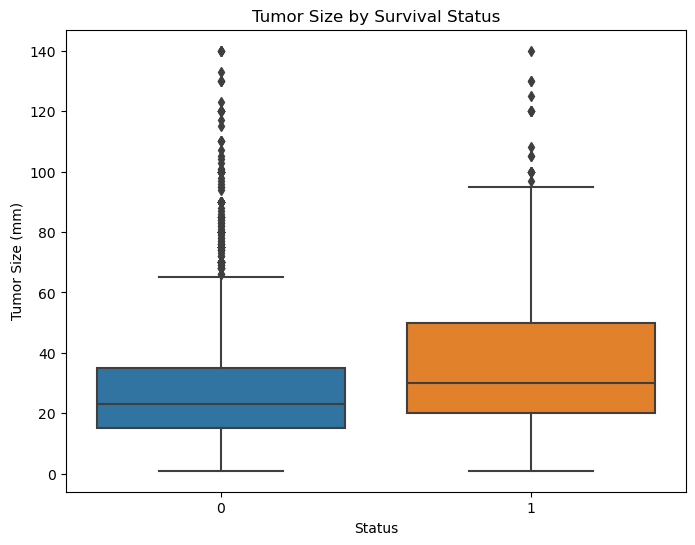

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Status", y="Tumor Size", data=df)
plt.title("Tumor Size by Survival Status")
plt.xlabel("Status")
plt.ylabel("Tumor Size (mm)")
plt.show()

## Analysis:
The boxplot comparing tumor size by survival status shows a clear difference. Patients who died generally had larger tumors than those who survived. This finding suggests that tumor size strongly influences outcome. It reinforces why tumor size should be treated as a critical predictor in further analysis.

# Q3: How does the number of regional lymph nodes examined relate to patient survival status?

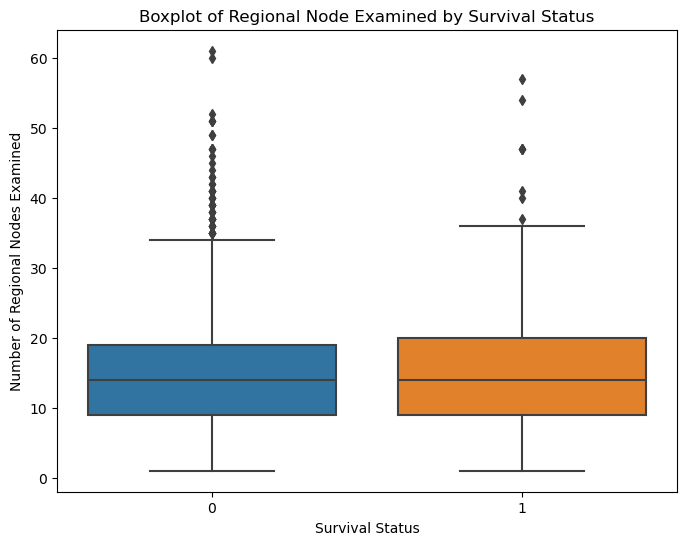

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Status", y="Regional Node Examined")
plt.title("Boxplot of Regional Node Examined by Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Number of Regional Nodes Examined")
plt.show()

## Analysis:
We asked how the number of regional lymph nodes examined relates to patient survival status. This feature, Regional Node Examined, records the number of lymph nodes that were surgically removed and checked for cancer. The outcome variable, Status, records whether the patient was alive or dead at follow-up.

The boxplot shows that the median number of nodes examined is slightly higher for patients who died compared to those who survived. Both groups have wide distributions, with many outliers where more than 40 nodes were examined. The overlap between the two distributions is large, which means that the number of nodes examined alone does not clearly separate survivors from non-survivors.

The clinical interpretation is important here. Examining more nodes does not directly worsen survival. Instead, it usually reflects more extensive surgery or more advanced disease, where physicians remove additional lymph nodes to check for spread. This explains why patients who died tend to have slightly higher counts: they were more likely to have advanced disease that prompted a larger number of nodes to be examined.

The implication for prediction is that Regional Node Examined contains some signal about disease severity but is not a strong predictor on its own. Its predictive value may increase when used together with related features such as Regional Node Positive or N Stage, which measure the extent of cancer spread. For modeling, we should keep this feature but expect it to contribute modestly rather than serve as a decisive variable.

# Conclusion:
Our analysis provides several important insights into the factors influencing breast cancer survival outcomes. First, tumor grade and tumor size are strongly associated with survival: patients with lower-grade tumors and smaller tumor sizes tend to have better outcomes. However, we noted that the distribution of tumor grades is imbalanced, limiting the reliability of that finding alone.

Age is another significant factor—patients who died were generally older, consistent with known clinical risks. Similarly, survival months showed a wide range, suggesting variability in outcomes and underscoring the need to identify which features most influence long-term survival.

We observed racial imbalance in the dataset, with White patients significantly overrepresented. Due to concerns about bias and limited generalizability, we decided to drop the race feature from our analysis.

The correlation heatmap revealed low-to-moderate correlations between features and survival status, suggesting no single predictor dominates. However, some variables like 6th Stage, N Stage, and Regional Node Positive show potential predictive value and are interrelated, reflecting disease progression. We also identified and removed redundant features—such as T Stage, Progesterone Status, and Differentiate—to avoid multicollinearity.

Finally, while the number of regional lymph nodes examined did not strongly predict survival on its own, it may provide useful information when combined with related staging features.

# Additional analysis:

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Remaining columns in df:
['Age', 'Marital Status', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


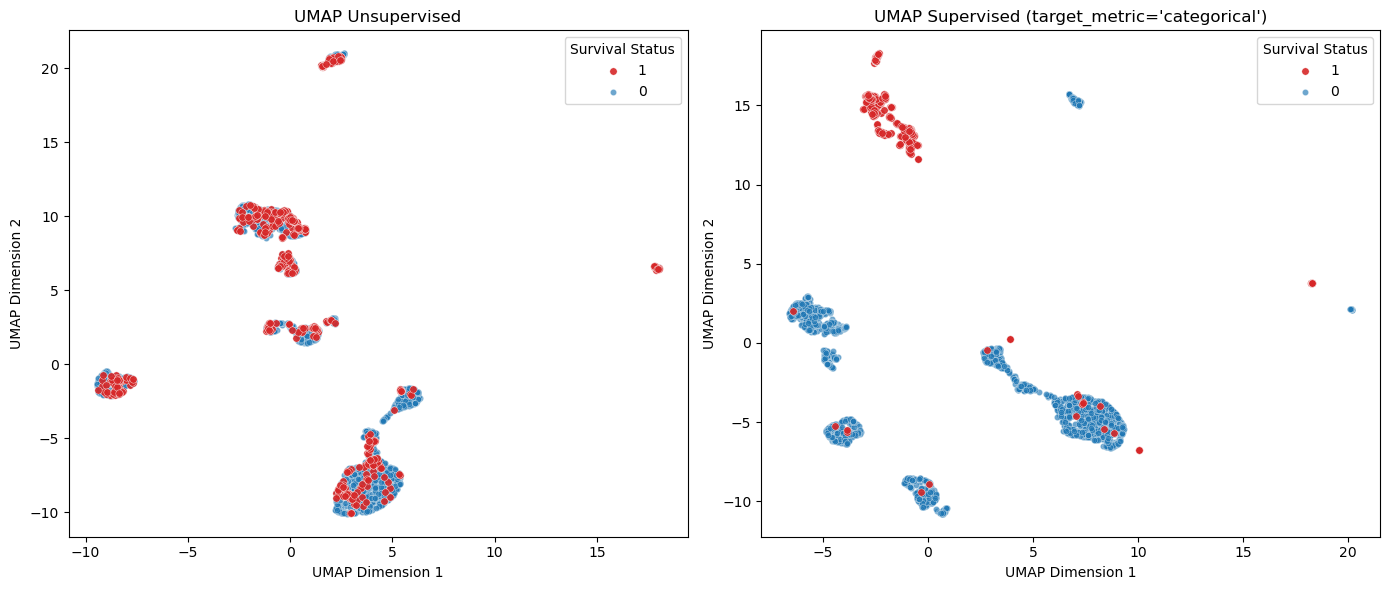

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 1) Prepare data
# -----------------------------
X = df.drop(columns=["Status"])
y = df["Status"].astype("category")     # should be 'Alive'/'Dead' (but we handle numeric too)
y_codes = pd.Categorical(y).codes       # for supervised UMAP

# One-hot encode & scale
X_enc = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X_enc)

# -----------------------------
# 2) UMAP embeddings
# -----------------------------
reducer_unsup = umap.UMAP(
    n_neighbors=50, min_dist=0.00, metric="cosine",
    n_components=2, random_state=42
)
X_umap = reducer_unsup.fit_transform(X_scaled)

reducer_sup = umap.UMAP(
    n_neighbors=50, min_dist=0.00, metric="cosine",
    n_components=2, target_metric="categorical", random_state=42
)
X_umap_sup = reducer_sup.fit_transform(X_scaled, y=y_codes)

# -----------------------------
# 3) Plot side-by-side (robust to label format)
# -----------------------------
# Ensure labels for plotting are STRINGS (e.g., 'Alive','Dead' or '0','1')
y_plot = pd.Series(y).astype(str)

# Build a palette from the *actual* label values so KeyError cannot happen
uniq = list(y_plot.unique())
# choose consistent colors (blue/red) if there are exactly two labels
if len(uniq) == 2:
    base_colors = ["#1f77b4", "#d62728"]
else:
    base_colors = sns.color_palette("Set1", n_colors=len(uniq))
palette = {lab: col for lab, col in zip(sorted(uniq), base_colors)}

counts = y_plot.value_counts()
# plot majority first, then minority on top
order = list(counts.index[::-1])

def plot_panel(ax, emb, labels_str, title):
    for cls in order:
        mask = (labels_str == cls).values
        ax.scatter(
            emb[mask, 0], emb[mask, 1],
            s=20 if counts[cls] > counts.min() else 28,
            c=palette[cls],
            alpha=0.65 if counts[cls] > counts.min() else 0.9,
            edgecolors="white", linewidths=0.3,
            label=cls,
            zorder=2 if counts[cls] == counts.min() else 1
        )
    ax.set_title(title)
    ax.set_xlabel("UMAP Dimension 1")
    ax.set_ylabel("UMAP Dimension 2")
    ax.legend(title="Survival Status", loc="upper right", frameon=True)
    ax.grid(False)

print("Remaining columns in df:")
print(df.columns.tolist())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_panel(axes[0], X_umap, y_plot, "UMAP Unsupervised")
plot_panel(axes[1], X_umap_sup, y_plot, "UMAP Supervised (target_metric='categorical')")
plt.tight_layout()
plt.show()


The UMAP projection provides a complementary perspective to the conclusions drawn from earlier analyses. In the unsupervised embedding, patients form small clusters but Alive and Dead cases remain heavily intermixed, reinforcing the observation from the correlation heatmap that no single feature strongly predicts survival and that the signal is dispersed across several variables. Even when supervision is introduced, the embedding shows only partial separation between survival groups, with considerable overlap persisting. This outcome aligns with the conclusion that variables such as tumor grade, tumor size, and staging features carry predictive information but are individually limited and often correlated, while factors like the number of regional lymph nodes examined add context without providing clear discrimination on their own. The UMAP visualization therefore supports the broader finding that breast cancer survival in this dataset cannot be neatly partitioned in a low-dimensional space, reflecting both the redundancy among features and the variability in patient outcomes observed in the survival months and age distributions.